In [246]:
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import missingno as msno
from sklearn.neighbors import KNeighborsRegressor
sns.set_style('darkgrid')
from pycaret.regression import setup, compare_models
pd.set_option('max_columns',None)
pd.set_option('max_rows',90)

Workflow:
    cleaning --Done
    feature engineering
    feature transformations --Done
    encoding --Done
    scaling --Done
    target transformation --Done
    model selection --Done
    hyperparameter optimization
    ebsembling --Done
    feature selection

In [247]:
train0 = pd.read_csv('dataset/train.csv')
test0 = pd.read_csv( 'dataset/test.csv')
sample_submission = pd.read_csv('dataset/sample_submission.csv')

Cleaning: Combine both train data and test data to get maximum results.

In [248]:
target = train0['SalePrice']
test_ids = test0['Id']

train1 = train0.drop(['Id', 'SalePrice'], axis=1)
test1 = test0.drop(['Id'], axis=1)
#combined data set both test and train to get more efficent result, only for the competations. 
#reseting index
data111 = pd.concat([train1, test1], axis=0).reset_index(drop=True)
#selecting only the numberic values 
data111.select_dtypes(np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,NaN,0.0,0.0,0,0,0,0,0,0,0,6,2006
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006


1 Missing Value Imputations - for categorical data

In [249]:
data222 = data111.copy()
#changing the MSSubclass type to string as its categorical data
data222['MSSubClass'] = data222['MSSubClass'].astype(str)


In [250]:
#getting all the columns which has only string values, and has atleast one missing value
data222.select_dtypes(np.object).loc[:,data222.isna().sum() > 0].columns


Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [251]:
# #only way to impute the categorical string data is by mode

#Impute using a constant value
for column in [
    'Alley',
    'MasVnrType',
    'MasVnrType',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]:
    data222[column] = data222[column].fillna("None")

#Impute using a column mode
for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
    data222[column] = data222[column].fillna(data222[column].mode()[0])



In [252]:
#data333 is combined both numeric and catrogrical data
data333 = data222.copy()

2 Missing Values for Numeric data

In [253]:
def knn_impute(df, na_target):
    df = df.copy()
    #dataframe with only numeric column
    numeric_df = df.select_dtypes(np.number)
    #selecting only the numeric columns with no missing values
    non_na_cols = numeric_df.select_dtypes(np.number).loc[:,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna()==False, na_target]
    x_train = numeric_df.loc[numeric_df[na_target].isna()==False, non_na_cols]
    x_test = numeric_df.loc[numeric_df[na_target].isna()==True, non_na_cols]
    
    knn = KNeighborsRegressor()
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    df.loc[df[na_target].isna()==True, na_target] = y_pred

    return df

In [254]:
for column in data333.columns[data333.isna().sum()>0].to_list():
    data333 = knn_impute(data333, column)


Done with the cleaning!!!

In [255]:
data444 = data333.copy()

In [256]:
data444.select_dtypes(np.number).columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

Feature transformations, Data does better with normalized distribution looking at the squew of a column to analyze whether the data is normaliy distributed squew can only be applied to numeric features

Finding skew, positive value means right skew, negative value mean left skewed if the data is over 0.5 it is considerd as skewed data

In [257]:
import scipy
#creating a new dataframe for skewd values
skew_df = pd.DataFrame(data444.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data444[feature]))
#converting negative falue to abs value (explanation 46:30)
skew_df['abs_skew'] = skew_df['skew'].apply(abs)
skew_df['skewed'] = skew_df['abs_skew'].apply(lambda abs_skew: True if abs_skew>=0.5 else False)


In [258]:
#skewed portion of the data which needs to transformed 
data444[skew_df.query('skewed == True')['Feature'].values]

,LotFrontage,LotArea,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,5,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,1,1,8,0,0,61,0,0,0,0,0
1,80.0,9600,8,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,0,1,6,1,298,0,0,0,0,0,0
2,68.0,11250,5,2001,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,1,1,6,1,0,42,0,0,0,0,0
3,60.0,9550,5,1915,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,0,1,7,1,0,35,272,0,0,0,0
4,84.0,14260,5,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,1,1,9,1,192,84,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,7,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,5,0,0,0,0,0,0,0,0
2915,21.0,1894,5,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,6,0,0,24,0,0,0,0,0
2916,160.0,20000,7,1960,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,0,1,7,1,474,0,0,0,0,0,0
2917,62.0,10441,5,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,0,1,6,0,80,32,0,0,0,0,700


Applying log transformation to fix the skewed data, however log transform does not work for values which are 0 as log(0) is undefined so we are using log(x+1) in numpy its np.log1p('')

In [259]:
for column in skew_df.query('skewed == True')['Feature'].values:
    data444[column] = np.log1p(data444[column])

handling cyclic functions (explanation 56:00) using cosine transform

In [260]:
# (explanation 58:00)
data444['MoSold'].unique()
data444['MoSold'] = -np.cos(0.524*data444['MoSold'])
#using cosine funtion to relate the values
data444['MoSold']

0      -0.499305
1       0.867027
2      -0.003611
3      -0.499305
4      -0.999988
          ...   
2914    0.999997
2915    0.501389
2916   -0.003611
2917    0.864618
2918   -0.868224
Name: MoSold, Length: 2919, dtype: float64

In [261]:
data555 = data444.copy()

Encoding Categoricals

In [262]:
#replace all the sting colums with a dummy data
data555 = pd.get_dummies(data555)

In [263]:
data666 = data555.copy()

Scaling, making all the columns centered at 0 with a variance of 1

In [264]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data666)

data666 = pd.DataFrame(scaler.transform(data666), index=data666.index, columns=data666.columns)

In [265]:
#making sure that there is no minimum value of 0, (explanation:1:08)
target.min()

34900

Text(0.5, 0, 'Log sale price')

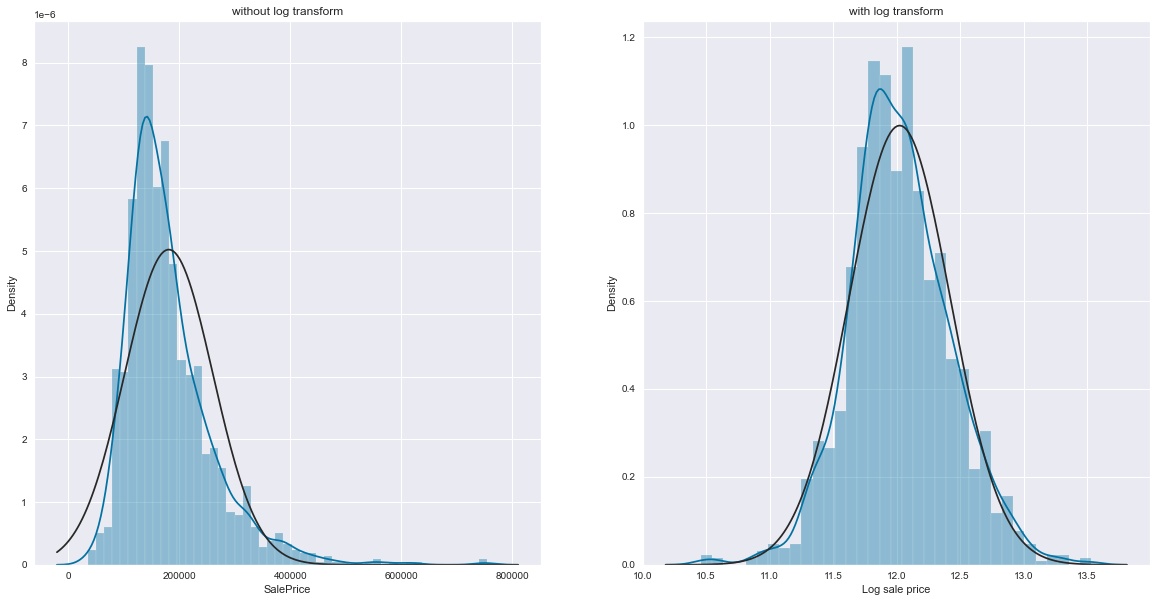

In [266]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('without log transform')
sns.distplot(target, kde=True, fit=scipy.stats.norm)

plt.subplot(1,2,2)
plt.title('with log transform')
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.xlabel('Log sale price')

In [267]:
log_target = np.log(target)

In [268]:
data777 =  data666.copy()

spliting the data back from test to train set

In [269]:
#new train data for data666
train_final = data777.loc[:train0.index.max(),:].copy()
#new test data for data666
test_final = data777.loc[train0.index.max()+1:,:].reset_index(drop=True).copy()

In [270]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [271]:
# _ = setup(data=pd.concat([train_final, log_target], axis=1), target='SalePrice')

In [272]:
# compare_models(n_select=5)

In [273]:
# from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score


Baseline mode using Bayesian Ridge	as it ranked first in the models

In [274]:
baseline_model = BayesianRidge(verbose=False)

In [275]:
baseline_model.fit(train_final, log_target)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

Evaluation of our baseline model

In [276]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10)
result = -cross_val_score(baseline_model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)

In [277]:
np.exp(np.sqrt(np.mean(result))) #(explanation 1;35)

1.1414957221970987

In [278]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [279]:
predictions = np.exp(baseline_model.predict(test_final))

submission process

In [280]:
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [281]:
submission = pd.concat([test_ids, pd.Series(predictions, name='SalePrice')], axis=1)

In [282]:
submission.to_csv('submission.csv', index=False, header=True)

Bagging Ensemble

In [283]:
models = {
    'omp':OrthogonalMatchingPursuit(),
    'br':BayesianRidge(),
    'lgbm':LGBMRegressor(),
    'gbr':GradientBoostingRegressor(),
    'ridge':Ridge()  
}

In [284]:
for name, model in models.items():
    model.fit(train_final, log_target)
    print(name + ' trained.')

omp trained.
br trained.
lgbm trained.
gbr trained.
ridge trained.


In [285]:
results = {}
kf = KFold(n_splits=10)
for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

In [286]:
results

{'omp': array([1.12550453, 1.09788011, 1.11981216, 1.17679697, 1.1555808 ,
        1.16092027, 1.13376685, 1.10647897, 1.19143393, 1.13965602]),
 'br': array([1.1264756 , 1.1078544 , 1.12698759, 1.1689856 , 1.15387105,
        1.14270207, 1.12838332, 1.10324423, 1.19869779, 1.13673277]),
 'lgbm': array([1.13932123, 1.11056857, 1.12900261, 1.1753656 , 1.17158268,
        1.11182928, 1.138628  , 1.11294699, 1.13512447, 1.15299037]),
 'gbr': array([1.13680543, 1.10678622, 1.12314108, 1.17575838, 1.16625628,
        1.1149204 , 1.13649793, 1.11424791, 1.12168718, 1.1514243 ]),
 'ridge': array([1.13444534, 1.11198514, 1.1285915 , 1.1745588 , 1.16031715,
        1.16638892, 1.134638  , 1.10353159, 1.21333121, 1.13535297])}

In [287]:
for name, result in results.items():
    print("--------\n"+name+"\n--------")
    print(np.mean(result))
    print(np.std(result))

--------
omp
--------
1.1407830606340297
0.02868472764737189
--------
br
--------
1.1393934426658392
0.02713633161588614
--------
lgbm
--------
1.1377359781040313
0.022145888157476156
--------
gbr
--------
1.134752511791691
0.022046703065962153
--------
ridge
--------
1.1463140624229073
0.030997412665095373


Combine Predections

In [291]:
predictions = (
    0.1*np.exp(models['omp'].predict(test_final)) +
    0.3*np.exp(models['br'].predict(test_final)) +
    0.3*np.exp(models['lgbm'].predict(test_final)) +
    0.3*np.exp(models['gbr'].predict(test_final)) 
)

In [292]:
submission = pd.concat([test_ids, pd.Series(predictions, name='SalePrice')], axis=1)

In [293]:
submission.to_csv('submission.csv', index=False, header=True)